### Loading data

Used app: https://play.google.com/store/apps/details?id=com.fivasim.androsensor&hl=en

In [1]:
import pandas as pd
import numpy as np

In [2]:
def read_csv(fname):

    headers = [
        "ax", "ay", "az",           # Acceleration (m/s²)
        "gvx", "gvy", "gvz",        # Gravity (m/s²)
        "lax", "lay", "laz",        # Linear Acceleration  (m/s²)
        "gyx", "gyy", "gyz",        # Gyroscope (°/s)
        "lux", "prox", "t", "ts",
    ]
    
    df = pd.read_csv(fname, skiprows=1, names=headers)
    
    # Move t & ts columns to front
    cols = df.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    df = df[cols]
    
    return df

In [3]:
# %matplotlib qt

import matplotlib
import matplotlib.pyplot as plt

import math

In [6]:
def magnitude(df, sensor):
    x2 = df[sensor + 'x'] * df[sensor + 'x']
    y2 = df[sensor + 'y'] * df[sensor + 'y']
    z2 = df[sensor + 'z'] * df[sensor + 'z']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m


def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_xlim([min(x), max(x)])
    
    mu = np.mean(y)
    std = np.std(y)
    
    ax.set_ylim([min(y) - std, max(y) + std])
    ax.set_title(title + " - Mean: %.2f, Std Dev: %.2f" % (mu, std))
    
    ax.xaxis.set_visible(False)
    ax.grid(True)
    
def plot_data(df, sensor, title):
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(15, 10), sharex=True)
    plot_axis(ax0, df['t'], df[sensor + 'x'], 'x Axis')
    plot_axis(ax1, df['t'], df[sensor + 'y'], 'y Axis')
    plot_axis(ax2, df['t'], df[sensor + 'z'], 'z Axis')
    plot_axis(ax3, df['t'], magnitude(df, sensor), "Magnitude")
    
    duration = (df['t'][df['t'].index[-1]] - df['t'][0]) / 60000
    plt.suptitle(title + " - %.2f minutes" % duration)
        
    plt.subplots_adjust(hspace=0.2)
    plt.show()

    
def plot_csv(df):
    plot_data(df, "a", "Accelerometer")
    # plot_data(df, "gv", "Gravity")
    # plot_data(df, "la", "Linear Acceleration")
#     plot_data(df, "gy", "Gyroscope")

In [18]:
still = read_csv("data/Still_Sensor_record_20180129_165941_AndroSensor.csv")
song = read_csv("data/Song_Sensor_record_20180129_170250_AndroSensor.csv")
alarm = read_csv("data/Alarm_Sensor_record_20180129_172756_AndroSensor.csv")

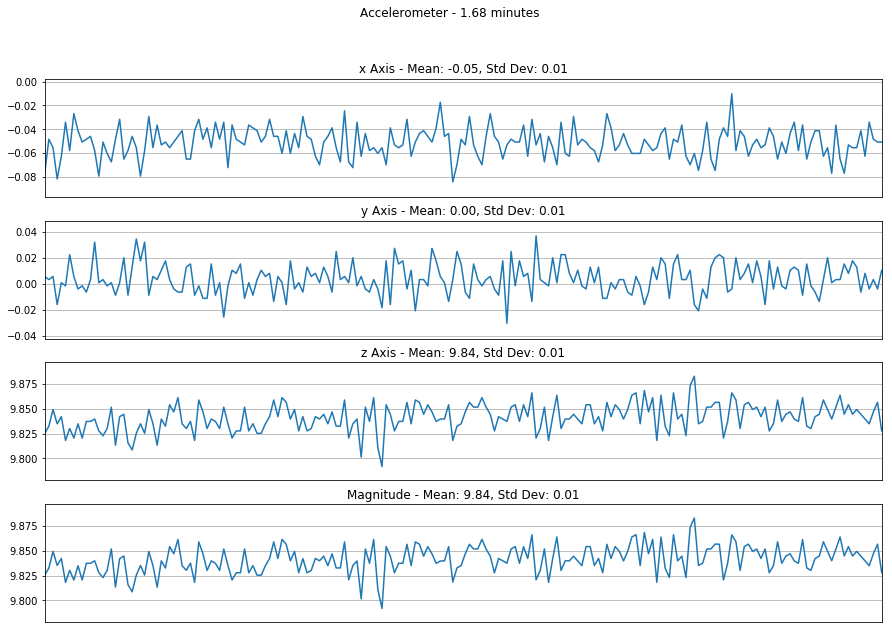

In [8]:
# Try to make lengths equal
still = still[:-125]
plot_csv(still)

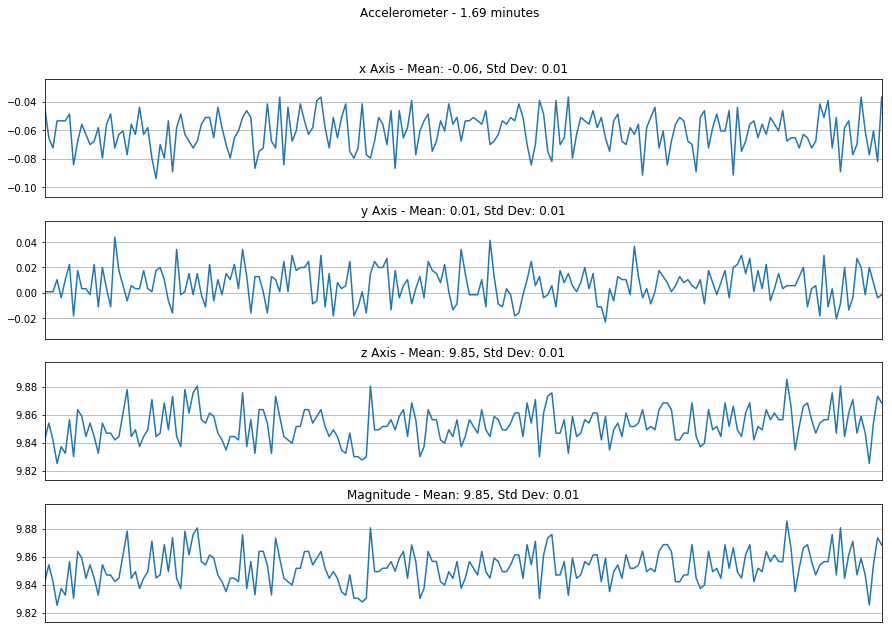

In [9]:
plot_csv(song)

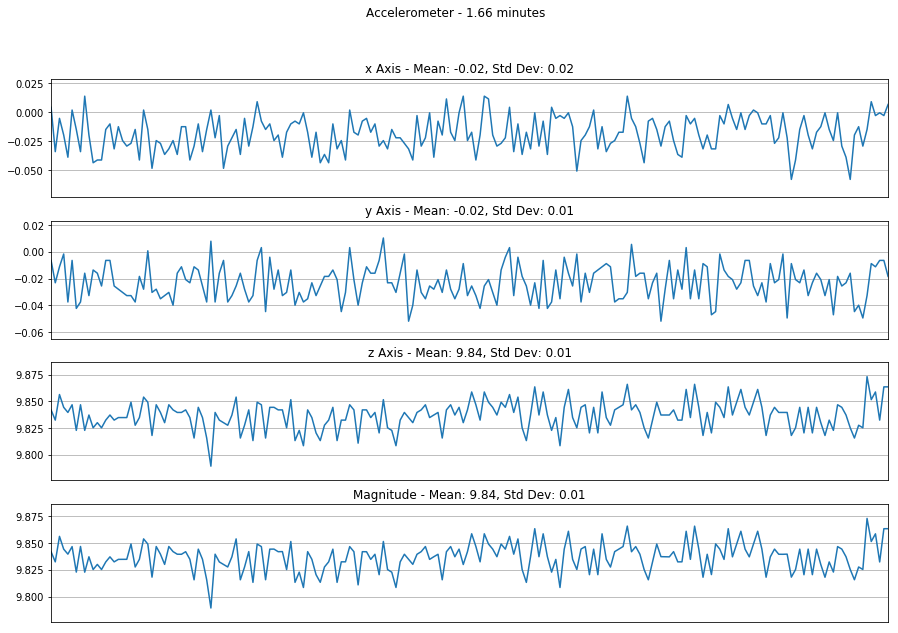

In [23]:
alarm = alarm[:200]
plot_csv(alarm)